In [199]:
import torch 
import numpy as np
from matplotlib import pyplot as plt

page_len = 6.4
fig_hei = 2
plt.rcParams['figure.figsize'] = page_len/2, fig_hei
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300

from scipy.linalg import eigvalsh
from ase.units import Hartree
from ase.io import read
from ase.visualize.plot import plot_atoms

In [59]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [53]:
root = '/scratch/pegolo/samsung_report_2024_06'

# Cutoff dependence

In [144]:
# too painful to move it here. It's in all_tests.ipynb

# Linear vs Nonlinear NN

In [45]:
vl_lin = np.loadtxt('/home/pegolo/valloss.dat')
vl_nli = np.loadtxt('/home/pegolo/valloss_10.dat')

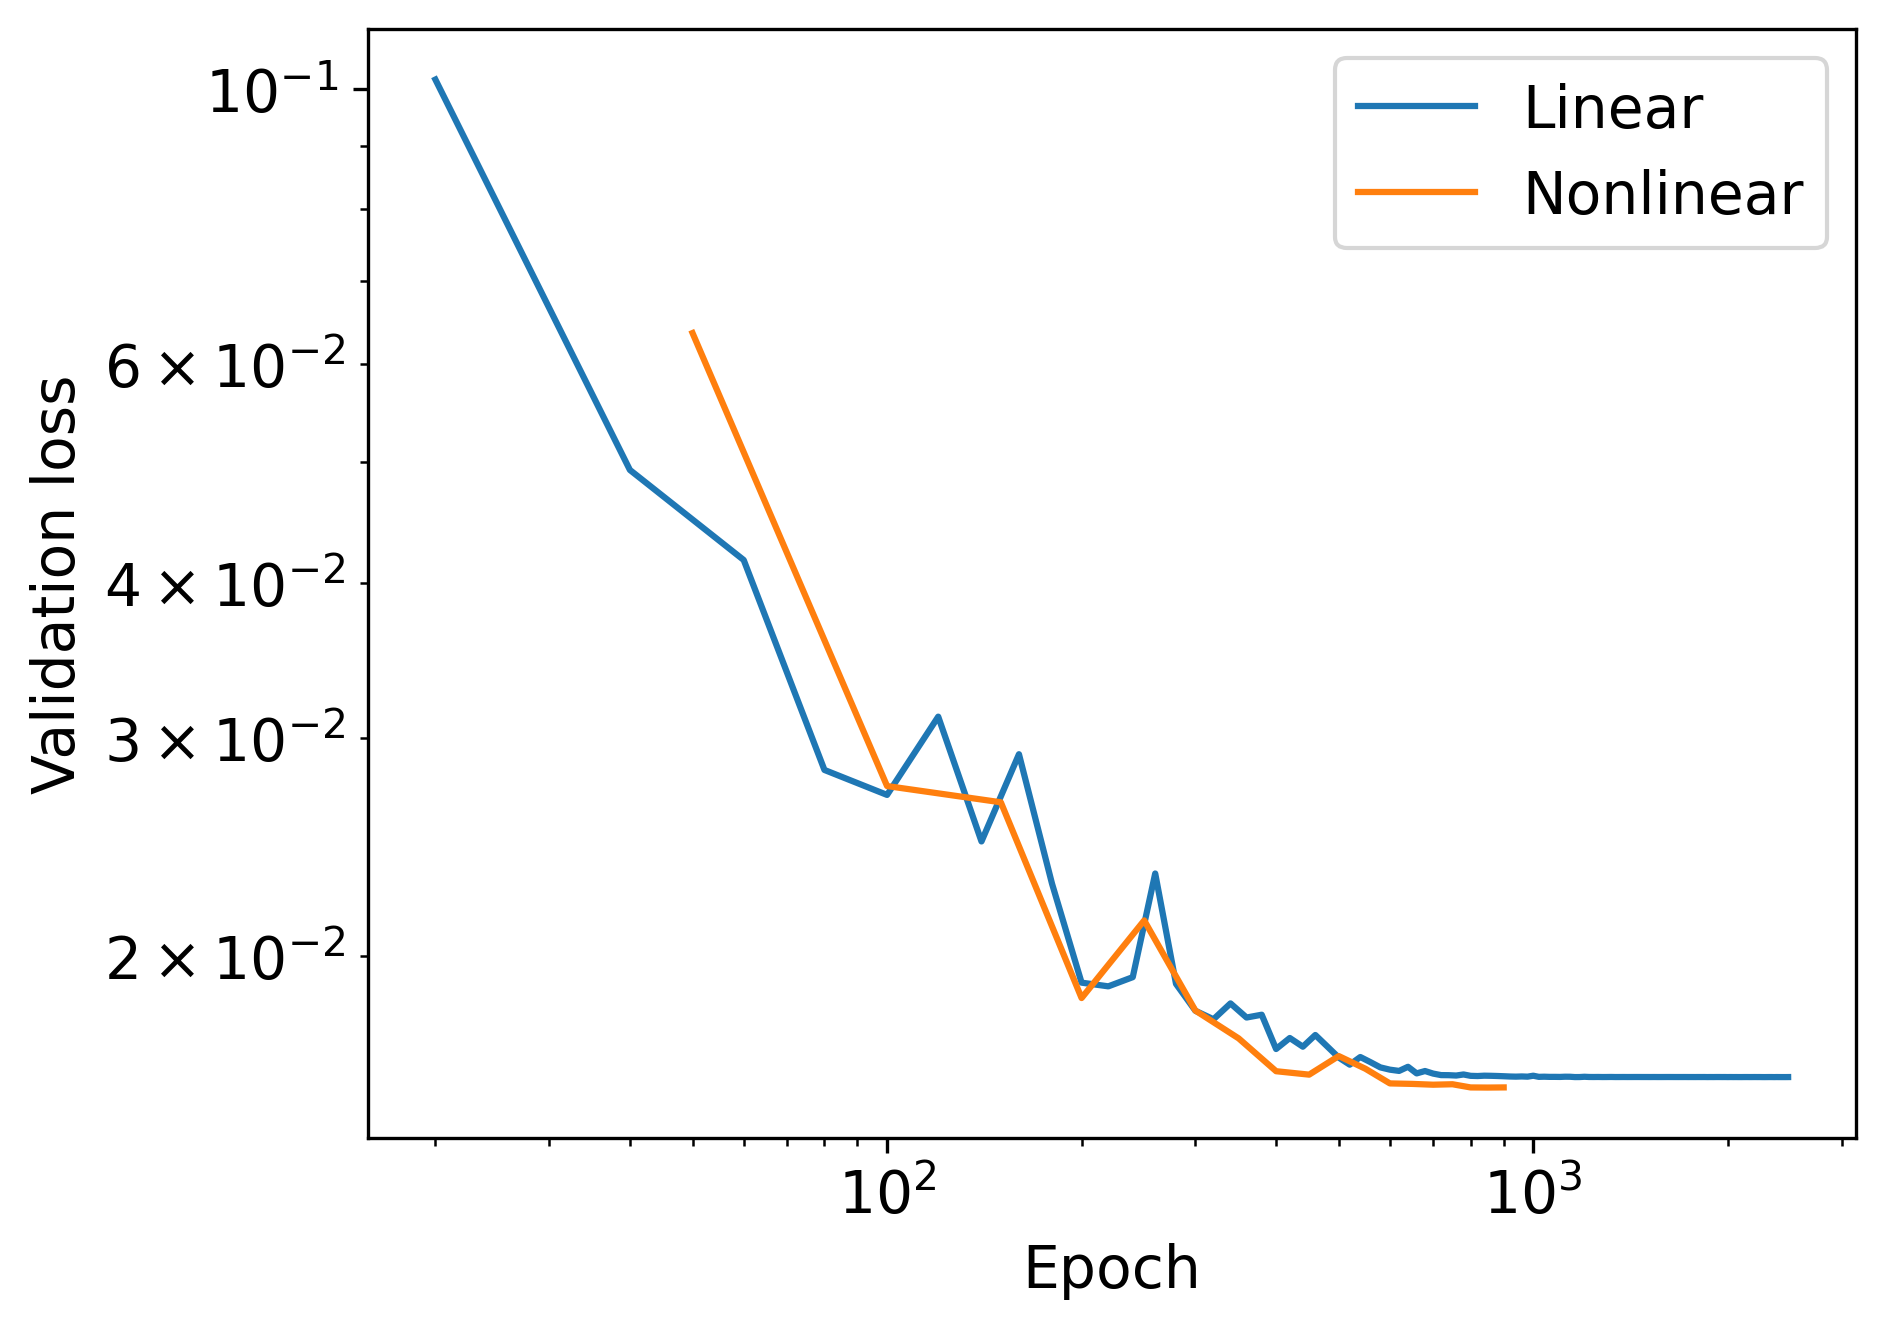

In [50]:
fig, ax = plt.subplots()
end = vl_nli[-1,1]
ax.plot(vl_lin[:,0], vl_lin[:,1], label = 'Linear')
ax.plot(vl_nli[:,0], vl_nli[:,1], label = 'Nonlinear')

# ax.plot(vl_lin[:,0], 100*np.abs(vl_lin[:,1]-end)/end, label = 'Linear')
# ax.plot(vl_nli[:,0], 100*np.abs(vl_nli[:,1]-end)/end, label = 'Nonlinear')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation loss')
ax.legend()
# ax.set_xlim(50, 1000)
# ax.set_ylim(1e-9,100)

In [220]:
loss_linear = np.loadtxt(f'{root}/data/linear.dat')
loss_nonlinear = np.loadtxt(f'{root}/data/nonlinear.dat')

(50, 1500)

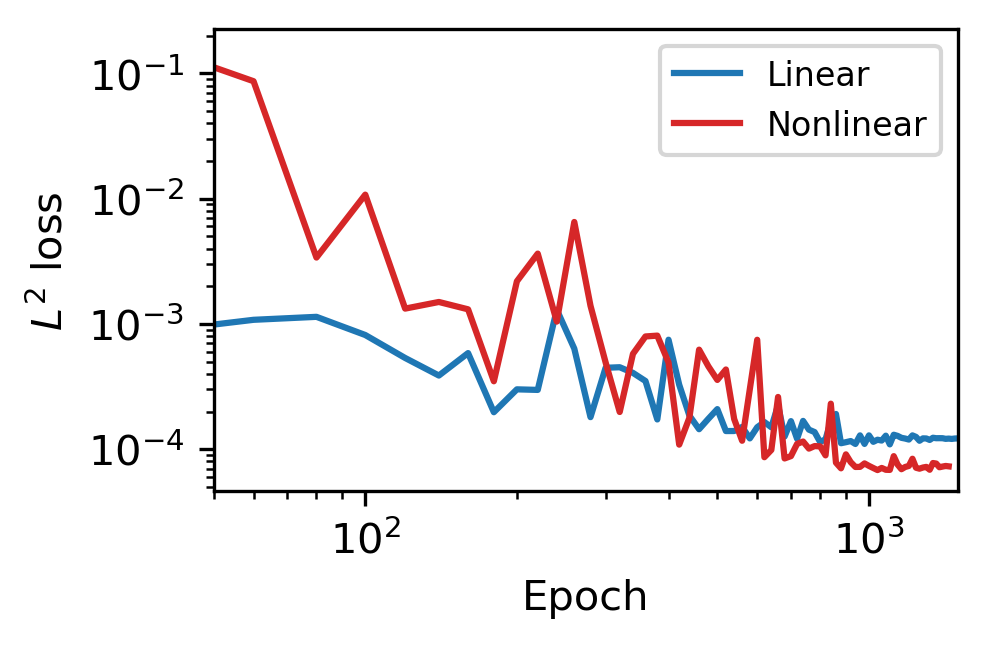

In [228]:
fig, ax = plt.subplots()
# end = vl_nli[-1,1]

# ax.plot(loss_linear[:,0], loss_linear[:,1]/100, 
#         label = 'Linear (train)', 
#         color = 'tab:blue')
ax.plot(loss_linear[:,0], loss_linear[:,2]/20, 
        label = 'Linear', 
        color = 'tab:blue', ls = '-')
# ax.plot(loss_nonlinear[:,0], loss_nonlinear[:,1]/100, 
#         label = 'Nonlinear (train)', 
#         color = 'tab:red')
ax.plot(loss_nonlinear[:,0], loss_nonlinear[:,2]/20, 
        label = 'Nonlinear', 
        color = 'tab:red', ls = '-')
# ax.plot(vl_lin[:,0], 100*np.abs(vl_lin[:,1]-end)/end, label = 'Linear')
# ax.plot(vl_nli[:,0], 100*np.abs(vl_nli[:,1]-end)/end, label = 'Nonlinear')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('$L^2$ loss')
ax.legend(fontsize = 8) #, loc = 'center left', bbox_to_anchor = (1, 0.5))
ax.set_xlim(50, 1500)

# Benchmark naive learning

## Graphene

In [190]:
eigenvalues = np.load(f'{root}/data/C2_eigenvalues.npy', allow_pickle = True).item()

(-35.0, 40.0)

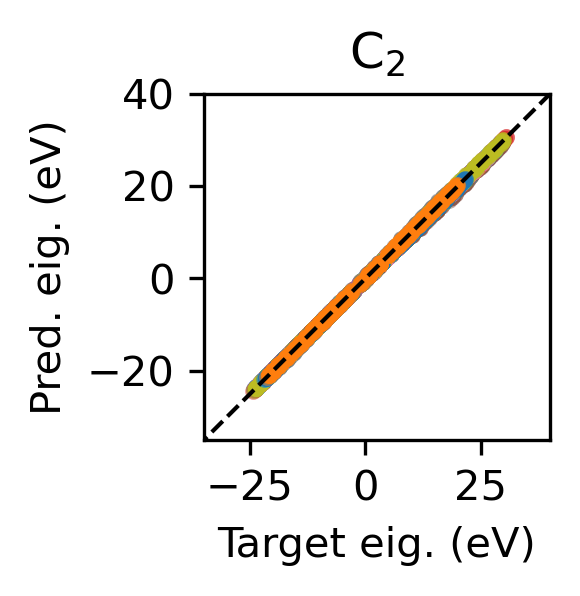

In [191]:
fig, ax = plt.subplots(figsize = (page_len/2, fig_hei/2))

ax.set_aspect('equal')

nevery = 1

xx = eigenvalues['target_au']
yy = eigenvalues['prediction_au'][40]

for x, y in zip(xx, yy):
    ax.plot(x.flatten()[::nevery]*Hartree, y.flatten()[::nevery]*Hartree, '.', alpha = 0.5)

ax.set_xlabel('Target eig. (eV)')
ax.set_ylabel('Pred. eig. (eV)')
ax.plot([-40,50], [-40,50], 'k', ls = '--', lw = 1)

# print('rmse','{:.2e}'.format(Hartree*1000*np.sqrt(torch.cat([(x.flatten()-y.flatten())**2  for  x, y in zip(xx, yy)]).mean().item())))
# print('std','{:.2e}'.format(Hartree*1000*torch.cat([x.flatten()  for  x, y in zip(xx, yy)]).std().item()))

ax.set_title('$\mathrm{C_2}$')

ax.set_xlim(-35,40)
ax.set_ylim(-35,40)

In [140]:
learning_curve = np.load(f'{root}/data/C2_learning_curve.npy', allow_pickle = True).item()

size 8.128 5.861538461538461


Text(0, 0.5, 'Test RMSE on $H(\\mathbf{k})$ (meV)')

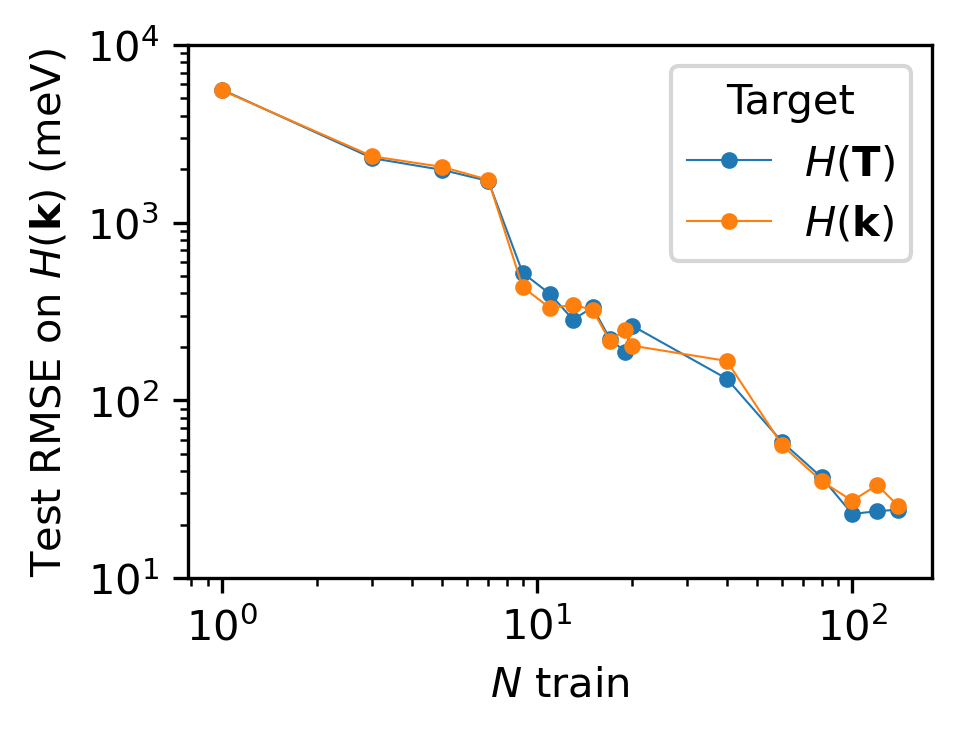

In [143]:
fig, ax = plt.subplots(figsize = (page_len/2, fig_hei/1.3))

print('size', page_len/2*2.54, fig_hei/1.3*2.54)

for space, strategy, name in zip(['real_space', 'kspace'], ['a', 'd'], ['$H(\mathbf{T})$', '$H(\mathbf{k})$']):
    x = np.array([N for N in learning_curve[space][strategy]])
    y = np.array([learning_curve[space][strategy][N]['matrix'] for N in learning_curve[space][strategy]])*Hartree*1000
    ax.loglog(x, y, '-o', lw = 0.5, markersize = 3, label = name)

ax.set_ylim(10,1e4)
ax.legend(title = 'Target')
ax.set_xlabel(r'$N$ train')
ax.set_ylabel(r'Test RMSE on $H(\mathbf{k})$ (meV)')

## MoS$_2$

In [192]:
eigenvalues = np.load(f'{root}/data/MoS2_eigenvalues.npy', allow_pickle = True).item()

(-20.0, 20.0)

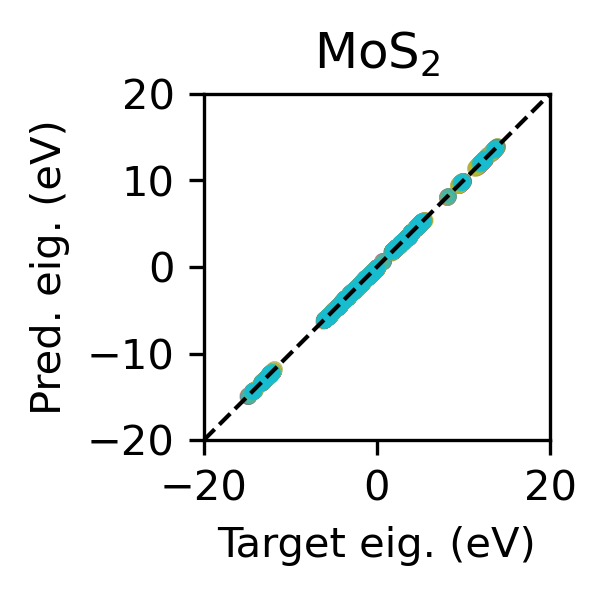

In [193]:
fig, ax = plt.subplots(figsize = (page_len/2, fig_hei/2))

ax.set_aspect('equal')

nevery = 1

xx = eigenvalues['target_au']
yy = eigenvalues['prediction_au'][10]

for x, y in zip(xx, yy):
    ax.plot(x.flatten()[::nevery]*Hartree, y.flatten()[::nevery]*Hartree, '.', alpha = 0.5)

ax.set_xlabel('Target eig. (eV)')
ax.set_ylabel('Pred. eig. (eV)')
ax.plot([-20,20], [-20,20], 'k', ls = '--', lw = 1)

# print('rmse','{:.2e}'.format(Hartree*1000*np.sqrt(torch.cat([(x.flatten()-y.flatten())**2  for  x, y in zip(xx, yy)]).mean().item())))
# print('std','{:.2e}'.format(Hartree*1000*torch.cat([x.flatten()  for  x, y in zip(xx, yy)]).std().item()))

ax.set_title('$\mathrm{MoS_2}$')

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

## Allotropes

In [133]:
data_allotropes = np.load(f'{root}/data/RMSE_and_eigenvalues_allotropes_N140.npy', allow_pickle = True).item()
frames = read(f'{root}/data/allotropes_testset.xyz', ':')

rmse 1.61e+02
std 1.06e+05


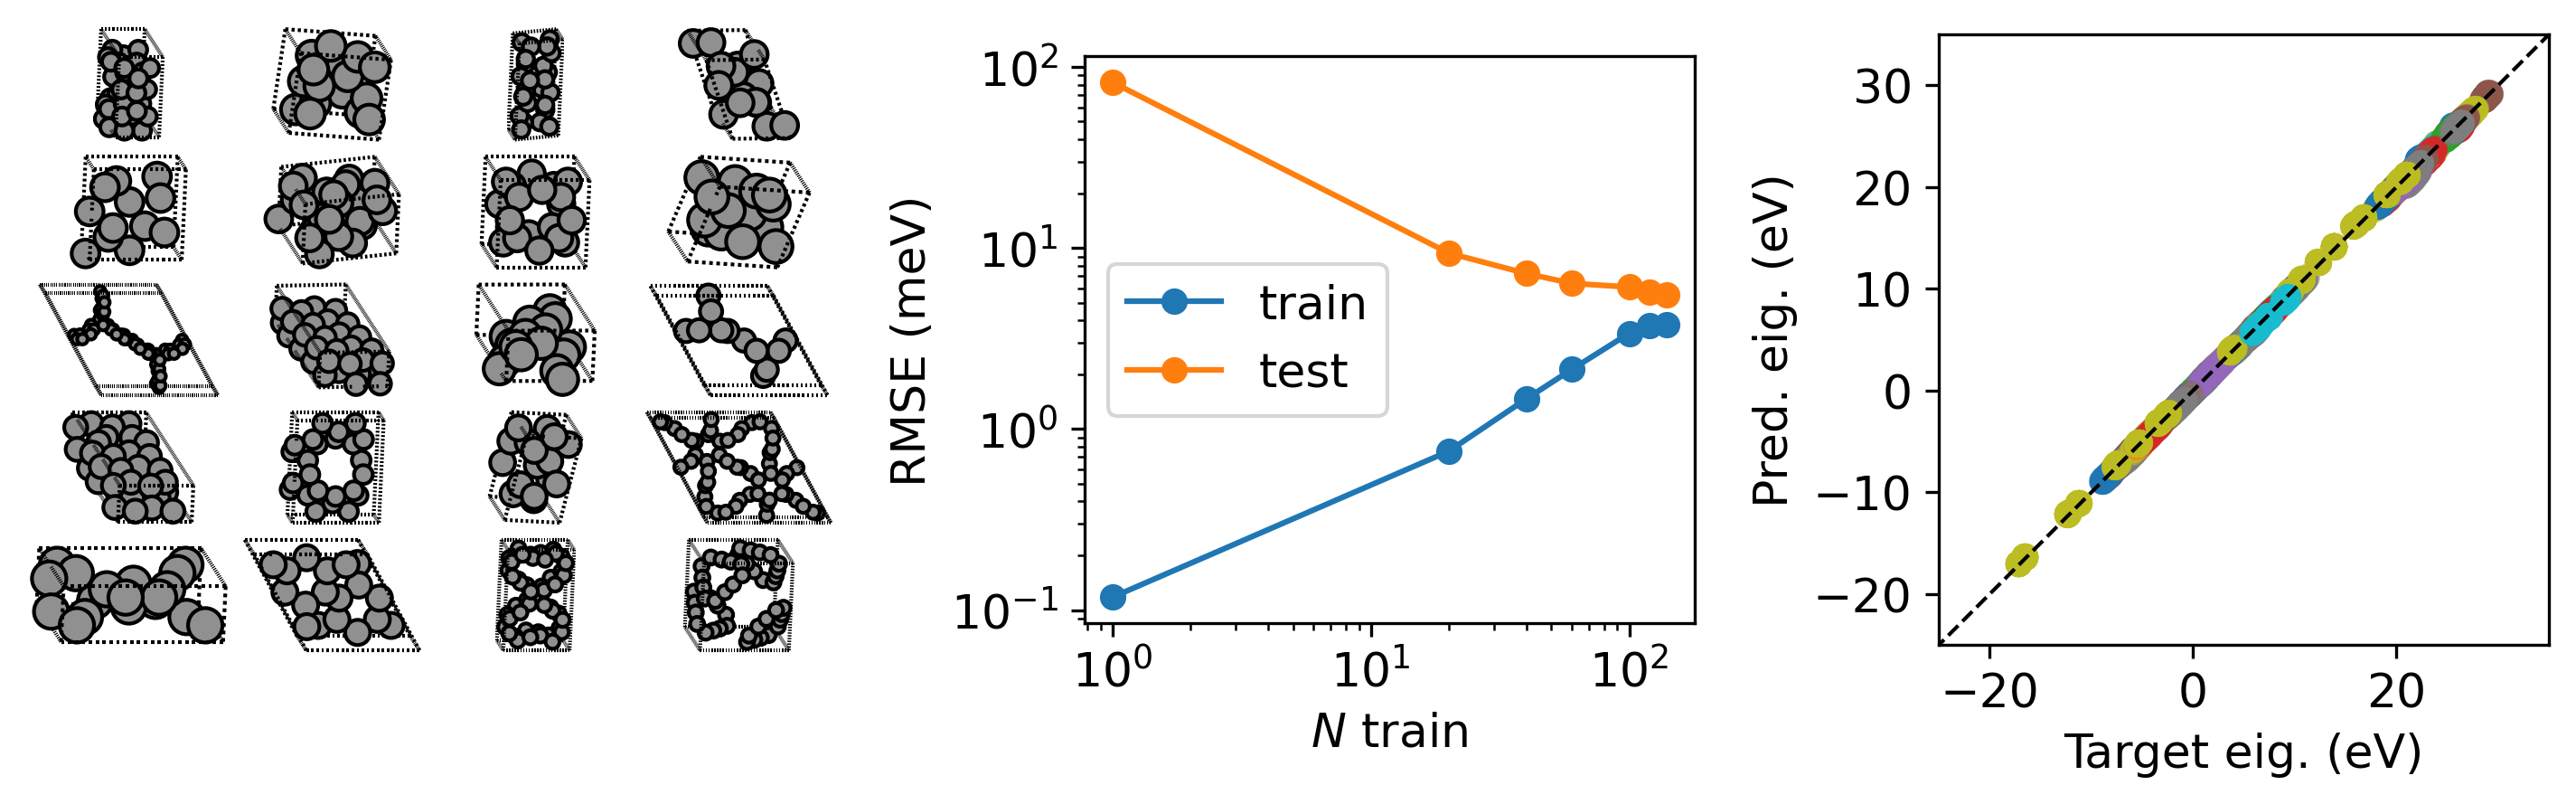

In [139]:
fig = plt.figure(figsize = (12,3))
fs = plt.rcParams['font.size']
plt.rcParams['font.size'] = fs*1.25

from matplotlib.gridspec import GridSpec

gs = GridSpec(5, 8, figure = fig, width_ratios = [1,1,1,1,1.2,3,1.2,3], wspace = 0, hspace = 0.1)

ifr = 0
for i in range(5):
    for j in range(4):
        ax = fig.add_subplot(gs[i, j])
        ax.axis('off')
        f = frames[ifr]
        f.wrap()
        plot_atoms(f, ax = ax, show_unit_cell = 2, rotation=('15x,10y,0z'))
        ifr += 1

###################################################################################################

units_name = 'meV'
units = Hartree*1000

ax = fig.add_subplot(gs[:, 5])
ax.set_aspect(0.7)

for tset in data_allotropes['RMSE_au']:
    
    x = data_allotropes['RMSE_au'][tset][:, 0]
    y = data_allotropes['RMSE_au'][tset][:, 1]
    ax.plot(x, y, '-o', label = tset)
    
ax.set_xlabel('$N$ train')
ax.set_ylabel(f'RMSE ({units_name})')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

###################################################################################################

ax = fig.add_subplot(gs[:, 7])

nevery = 500

ax.set_aspect('equal')

xx = data_allotropes['eigenvalues']['target_au']
yy = data_allotropes['eigenvalues']['prediction_au']

for x, y in zip(xx, yy):
    ax.plot(x.flatten()[::nevery]*Hartree, y.flatten()[::nevery]*Hartree, 'o', alpha = 0.5)

ax.set_xlabel('Target eig. (eV)')
ax.set_ylabel('Pred. eig. (eV)')
ax.plot([-275,50], [-275,50], 'k', ls = '--', lw = 1)

print('rmse','{:.2e}'.format(Hartree*1000*np.sqrt(torch.cat([(x.flatten()-y.flatten())**2  for  x, y in zip(xx, yy)]).mean().item())))
print('std','{:.2e}'.format(Hartree*1000*torch.cat([x.flatten()  for  x, y in zip(xx, yy)]).std().item()))

ax.set_xlim(-25,35)
ax.set_ylim(-25,35)

plt.rcParams['font.size'] = fs

# fig.tight_layout()

# Benchmark k-learning

# Preliminary indirect learning